# Compare TensorFlow with Skflow
## Linear and Logistic Regression

In [1]:
import tensorflow as tf
import skflow
from sklearn.datasets import make_regression, make_classification
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Regression

## Create Data

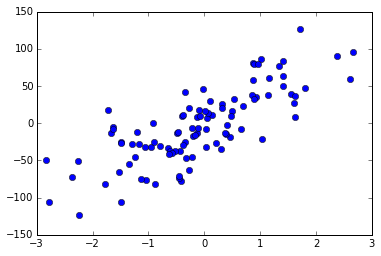

In [2]:
X_train, y_train = make_regression(n_samples=100, n_features = 1, noise = 30)
n_samples = X_train.shape[0]

plt.plot(X_train, y_train, 'o')
plt.show()

## TensorFlow

In [3]:
# create placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")
# create weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
# create model
activation = tf.add(tf.mul(X, W), b)

# cost function
cost = tf.reduce_sum(tf.pow(activation - Y, 2))/(2*n_samples)
# train model
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

Iteration = 1, Cost = 119711.5, W = 0.80772870779, B = -1.29368770123
Iteration = 51, Cost = 136931.8125, W = 16.4382362366, B = -1.91555392742
Iteration = 101, Cost = 158537.6875, W = 24.5337524414, B = -1.82099413872
Iteration = 151, Cost = 173135.078125, W = 28.7392921448, B = -1.51897907257
Iteration = 201, Cost = 181648.859375, W = 30.9315719604, B = -1.20849275589
Iteration = 251, Cost = 186350.71875, W = 32.0791091919, B = -0.95369130373
Iteration = 301, Cost = 188890.984375, W = 32.6825370789, B = -0.764271259308
Iteration = 351, Cost = 190253.0, W = 33.0015335083, B = -0.630998551846
Iteration = 401, Cost = 190982.015625, W = 33.1710472107, B = -0.540425419807
Iteration = 451, Cost = 191375.125, W = 33.2620658875, B = -0.480291932821
Iteration = 501, Cost = 191586.921875, W = 33.3109855652, B = -0.441019356251
Iteration = 551, Cost = 191701.578125, W = 33.3373565674, B = -0.415697038174
Iteration = 601, Cost = 191765.265625, W = 33.352104187, B = -0.399518549442
Iteration = 65

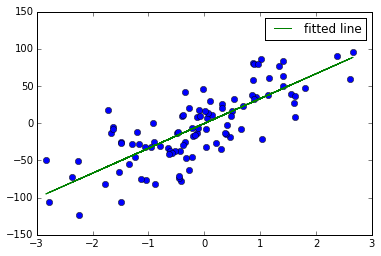

In [5]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        # fit 
        for (x, y) in zip(X_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        # print 
        if i % 50 == 0:
            print 'Iteration = {}, Cost = {}, W = {}, B = {}'.format(i+1, sess.run(cost, 
                                                                                   feed_dict = {X:X_train, Y:y_train}),
                                                                                    sess.run(W), sess.run(b))
    print 'Finshed'
    print 'Iteration = {}, Cost = {}, W = {}, B = {}'.format(i+1, sess.run(cost, 
                                                                           feed_dict = {X:X_train, Y:y_train}),
                                                                            sess.run(W), sess.run(b))
    # plot data
    plt.plot(X_train, y_train, 'o')
    plt.plot(X_train, sess.run(W) * X_train + sess.run(b), label = 'fitted line')
    plt.legend()
    plt.show()

## Skflow

Step #1, avg. loss: 3727.62573
Step #501, epoch #50, avg. loss: 1544.75000
Step #1001, epoch #100, avg. loss: 978.40210
Step #1501, epoch #150, avg. loss: 938.58435
Step #2001, epoch #200, avg. loss: 936.35626
Step #2501, epoch #250, avg. loss: 937.52948
Step #3001, epoch #300, avg. loss: 938.65448
Step #3501, epoch #350, avg. loss: 935.28510
Step #4001, epoch #400, avg. loss: 937.85052
Step #4501, epoch #450, avg. loss: 936.23889


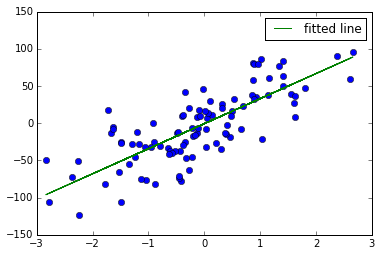

In [6]:
regressor = skflow.TensorFlowLinearRegressor(batch_size = 10, steps = 5000, learning_rate = 0.01)
regressor.fit(X_train, y_train)

plt.plot(X_train, y_train, 'o')
plt.plot(X_train, regressor.predict(X_train), label = 'fitted line')
plt.legend()
plt.show()

# Classification

## Get The Data

In [7]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
import pandas as pd

keys = ['Sepal Length', 'Sepal Width','Petal Length', 'Petal Width']

dat = pd.DataFrame(load_iris().data)
dat.columns = keys
dat['target'] = load_iris().target

d = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
dat['target'] = dat.target.map(d)

species = list(dat['target'].unique())
dat['one_hot'] = dat.target.map(lambda x: np.eye(len(species))[species.index(x)])
dat.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,target,one_hot
0,5.1,3.5,1.4,0.2,setosa,"[1.0, 0.0, 0.0]"
1,4.9,3.0,1.4,0.2,setosa,"[1.0, 0.0, 0.0]"
2,4.7,3.2,1.3,0.2,setosa,"[1.0, 0.0, 0.0]"
3,4.6,3.1,1.5,0.2,setosa,"[1.0, 0.0, 0.0]"
4,5.0,3.6,1.4,0.2,setosa,"[1.0, 0.0, 0.0]"


In [8]:
train, test = train_test_split(dat, test_size = 50)

## TensorFlow

In [9]:
n_features = 4
n_classes = 3

X = tf.placeholder(tf.float32, shape = [None, n_features])
Y = tf.placeholder(tf.float32, shape = [None, n_classes])

W = tf.Variable(tf.zeros([n_features, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

activation = tf.nn.softmax(tf.matmul(X, W) + b)
cost = -tf.reduce_sum(Y * tf.log(activation))

optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [10]:
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        batch = train.sample(50)
        sess.run(optimizer, feed_dict = {X : [x for x in train[keys].values],
                                        Y : [x for x in train['one_hot'].as_matrix()]})
        
    print 'accuracy', sess.run(accuracy, feed_dict = {X : [x for x in test[keys].values],
                                                     Y : [x for x in test['one_hot'].values]})
        

accuracy 1.0


In [11]:
def classify(pred):
    with tf.Session() as sess:
        sess.run(init)
        dim = Y.get_shape().as_list()[1]
        res = np.zeros(dim)
        # argmax returns a single element vector, so get the scalar from it
        largest = sess.run(tf.argmax(activation, 1), feed_dict = {X: pred})[0]
        return np.eye(dim)[largest]
    
sample = train.sample(1)
print "Classified as %s" % classify(sample[keys])

Classified as [ 1.  0.  0.]


## Skflow

In [12]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(load_iris().data, load_iris().target,
    test_size=0.2, random_state=42)

clf = skflow.TensorFlowClassifier(n_classes = 3, steps = 500)
clf.fit(X_train, y_train)

print 'accuracy', accuracy_score(y_test, clf.predict(X_test))

Step #1, avg. loss: 4.91489
Step #51, epoch #12, avg. loss: 1.02452
Step #101, epoch #25, avg. loss: 0.58497
Step #151, epoch #37, avg. loss: 0.43115
Step #201, epoch #50, avg. loss: 0.39415
Step #251, epoch #62, avg. loss: 0.31821
Step #301, epoch #75, avg. loss: 0.25476
Step #351, epoch #87, avg. loss: 0.24791
Step #401, epoch #100, avg. loss: 0.23674
Step #451, epoch #112, avg. loss: 0.20667
accuracy 1.0


# Neural Network

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [31]:
n_input = 784
n_classes = 10

# graph inputs
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

def conv2d(img, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(img, w, strides=[1, 1, 1, 1], 
                                                  padding='SAME'), b))

def max_pool(img, k):
    return tf.nn.max_pool(img, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')

def conv_net(_X, _weights, _biases, _dropout):
    # Reshape input picture
    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(_X, _weights['wc1'], _biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = max_pool(conv1, k=2)
    # Apply Dropout
    conv1 = tf.nn.dropout(conv1, _dropout)

    # Convolution Layer
    conv2 = conv2d(conv1, _weights['wc2'], _biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = max_pool(conv2, k=2)
    # Apply Dropout
    conv2 = tf.nn.dropout(conv2, _dropout)

    # Fully connected layer
    # Reshape conv2 output to fit dense layer input
    dense1 = tf.reshape(conv2, [-1, _weights['wd1'].get_shape().as_list()[0]]) 
    # Relu activation
    dense1 = tf.nn.relu(tf.add(tf.matmul(dense1, _weights['wd1']), _biases['bd1']))
    # Apply Dropout
    dense1 = tf.nn.dropout(dense1, _dropout) # Apply Dropout

    # Output, class prediction
    out = tf.add(tf.matmul(dense1, _weights['out']), _biases['out'])
    return out

In [32]:
# Store layers / weights

weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1' : tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out' : tf.Variable(tf.random_normal([1024, n_classes]))
}

bias = {
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [33]:
pred = conv_net(x, weights, bias, keep_prob)

In [26]:
# define cost
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
cost = tf.reduce_sum(y * tf.log(pred))
# define opt
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(cost)

In [27]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) 

In [38]:
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()
sess.run(inint)

for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict = {x: batch[0], y: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    optimizer.run(feed_dict = {x: batch[0], y: batch[1], keep_prob: 0.5})

print("test accuracy %g"% accuracy.eval(feed_dict = {x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.12
step 100, training accuracy 0.12
step 200, training accuracy 0.12


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x10f075d90>> ignored


KeyboardInterrupt: 

In [30]:
1e-04

0.0001